In [1]:
import numpy as np
import pandas as pd

In [2]:
def polynomial_dframe(feature, degree):
    poly_dframe = pd.DataFrame()
    poly_dframe['power_1'] = feature
    if degree>1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dframe[name] = feature**power
    return poly_dframe

In [3]:
tmp = np.array([1.,2.,3.])

In [4]:
print(polynomial_dframe(tmp,3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [6]:
sales = pd.read_csv('kc_house_data.csv')

In [7]:
sales = sales.sort(['sqft_living','price'])

/home/saransh/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [8]:
poly_1_data = polynomial_dframe(sales['sqft_living'],1)
poly_1_data['price'] = sales['price']

In [9]:
poly_1_data.head()

,power_1,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0


In [10]:
from sklearn import linear_model

In [11]:
model1 = linear_model.LinearRegression()

In [12]:
f1 = ['power_1']
o = ['price']
x = poly_1_data[f1]
y = poly_1_data[o]

In [13]:
model1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(model1.coef_)
print(model1.intercept_)

[[ 280.6235679]]
[-43580.74309447]


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

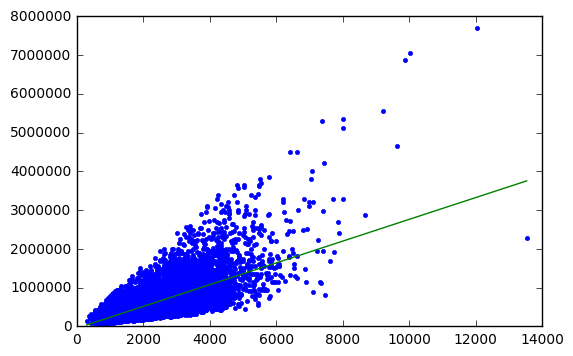

In [16]:
plt.plot(poly_1_data['power_1'],poly_1_data['price'],'.',
         poly_1_data['power_1'],model1.predict(x),'-')

In [17]:
poly_2_data = polynomial_dframe(sales['sqft_living'],2)
abc = poly_2_data.columns.astype(str)
my_features = []
for i in range(len(abc)):
    my_features.append(abc[i])
poly_2_data['price'] = sales['price']
model2 = linear_model.LinearRegression()
x2 = poly_2_data[my_features]
y2 = poly_2_data[o]
model2.fit(x2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print(model2.coef_)
print(model2.intercept_)

[[  6.79940947e+01   3.85812609e-02]]
[ 199222.27930548]


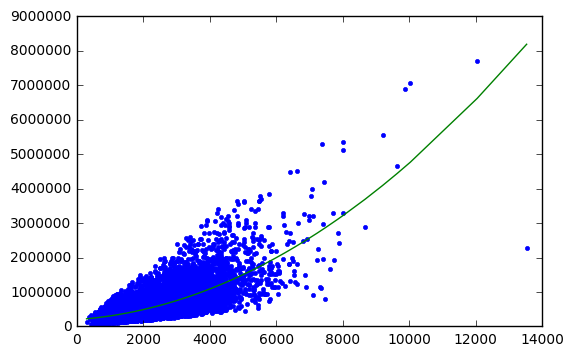

In [19]:
plt.plot(poly_2_data['power_1'],poly_2_data['price'],'.',
         poly_2_data['power_1'],model2.predict(x2),'-')

In [23]:
poly_3_data = polynomial_dframe(sales['sqft_living'],3)
abc = poly_3_data.columns.astype(str)
my_features = []
for i in range(len(abc)):
    my_features.append(abc[i])
poly_3_data['price'] = sales['price']
model3 = linear_model.LinearRegression()
x3 = poly_3_data[my_features]
y3 = poly_3_data[o]
model3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(model3.coef_)
print(model3.intercept_)

[[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]]
[ 336819.74821982]


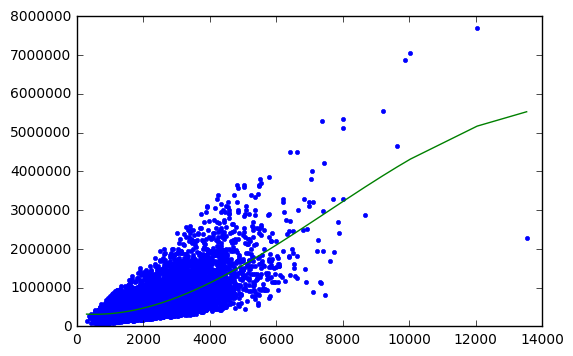

In [26]:
plt.plot(poly_3_data['power_1'],poly_3_data['price'],'.',
         poly_3_data['power_1'],model3.predict(x3),'-')

In [27]:
poly_15_data = polynomial_dframe(sales['sqft_living'],15)
abc = poly_15_data.columns.astype(str)
my_features = []
for i in range(len(abc)):
    my_features.append(abc[i])
poly_15_data['price'] = sales['price']
model15 = linear_model.LinearRegression()
x15 = poly_15_data[my_features]
y15 = poly_15_data[o]
model15.fit(x15,y15)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print(model15.coef_)
print(model15.intercept_)

[[  1.61008817e-05   4.15022858e-02   4.24606308e-06  -4.15678092e-10
   -4.77482637e-15  -3.40005801e-16  -6.65667608e-15   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]]
[ 220737.8581239]


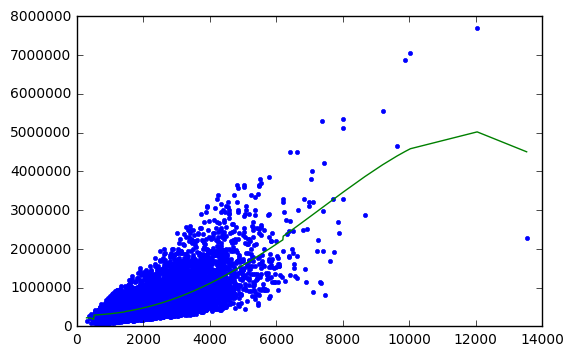

In [29]:
plt.plot(poly_15_data['power_1'],poly_15_data['price'],'.',
         poly_15_data['power_1'],model15.predict(x15),'-')